In [5]:
using ReinforcementLearningAnIntroduction

In [6]:
using Distributions
using Plots

const pₕ = 0.4
const WinCapital = 100

decode_state(s::Int) = s - 1
encode_state(s::Int) = s + 1

function nextstep(s::Int, a::Int)
    s = decode_state(s)
    a = min(s, a)
    if s == WinCapital
        [(nextstate=encode_state(s), reward=0., prob=1.0)]
    elseif s == 0
        [(nextstate=encode_state(s), reward=0., prob=1.0)]
    else
        [(nextstate=encode_state(min(s+a, WinCapital)), reward= s+a >= WinCapital ? 1.0 : 0., prob=pₕ),
         (nextstate=encode_state(max(s-a, 0)), reward=0., prob=1-pₕ)]
    end
end

const GamblerProblemEnvModel = DeterministicDistributionModel([nextstep(s, a) for s in 1:(WinCapital+1), a in 1:WinCapital]);

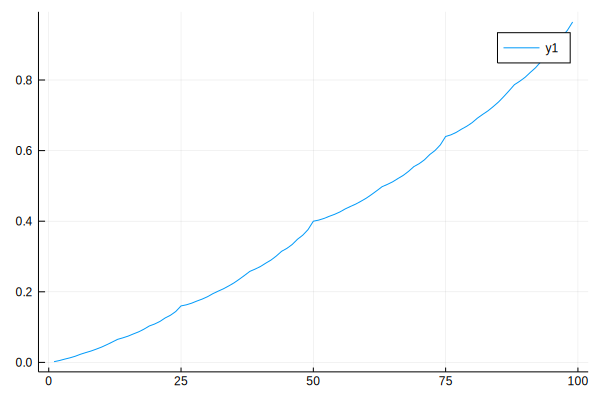

In [7]:
V = TabularApproximator(n_state=1+WinCapital)
value_iteration!(V=V, model=GamblerProblemEnvModel, γ=1.0, max_iter=1000)
plot(V.table[2:end-1])